In [86]:
import pandas as pd
import numpy as np

In [87]:
# read csv
student_data = pd.read_csv('StudentsPerformance.csv')
student_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [88]:
student_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Calculate specific columns

In [5]:
student_data['math score'].sum()

66089

In [6]:
student_data['math score'].mean()

66.089

In [7]:
student_data['math score'].max()

100

In [8]:
student_data['math score'].min()

0

In [9]:
student_data['math score'].count()

1000

# Rows

In [89]:
student_data['average'] = (student_data['math score'] + student_data['reading score'] + student_data['writing score'])/3
# student_data.mean(axis=1)
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [11]:
# count
student_data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# Creating if conditions for the dataset

In [12]:
# if condition
student_data['pass/fail'] = np.where(student_data['average'] > 70, 'Pass', 'Fail')
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass


In [16]:
# multiple conditions
conditions = [
    (student_data['average']>=90),
    (student_data['average']>=80) & (student_data['average']<90),
    (student_data['average']>=70) & (student_data['average']<80),
    (student_data['average']>=60) & (student_data['average']<70),
    (student_data['average']>=50) & (student_data['average']<60),
    (student_data['average']<50),
]

values = ['A', 'B', 'C', 'D', 'E', 'F']

In [17]:
student_data['grades'] = np.select(conditions, values)
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail,F
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass,C


In [18]:
# show first 5 rows
student_data[['average', 'pass/fail', 'grades']].head()

,average,pass/fail,grades
0,72.666667,Pass,C
1,82.333333,Pass,B
2,92.666667,Pass,A
3,49.333333,Fail,F
4,76.333333,Pass,C


# Creating SumIf, CountIf, AverageIf for the dataset

In [22]:
# only sum scores for the female gender
student_female = student_data[student_data['gender'] == 'female']
# student_female['sum'] = student_female.sum(axis=1)

# Working with two different conditions

In [23]:
# sum scores for the females in grupo B
data_sumifs = student_data[(student_data['gender'] == 'female') & (student_data['race/ethnicity'] == 'group B')]
data_sumifs = data_sumifs.assign(sumifs = data_sumifs['math score'] + data_sumifs['reading score'] + data_sumifs['writing score'])
data_sumifs

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail,grades,sumifs
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C,218
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,A,278
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,Pass,C,232
6,female,group B,some college,standard,completed,88,95,92,91.666667,Pass,A,275
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,Fail,F,148
...,...,...,...,...,...,...,...,...,...,...,...,...
923,female,group B,associate's degree,free/reduced,none,54,65,65,61.333333,Fail,D,184
944,female,group B,high school,standard,none,58,68,61,62.333333,Fail,D,187
969,female,group B,bachelor's degree,standard,none,75,84,80,79.666667,Pass,C,239
980,female,group B,high school,free/reduced,none,8,24,23,18.333333,Fail,F,55


# Basic Data Cleaning
Change the case of text with .str.lower, .str.upper or .str.title

In [21]:
student_data['gender'].str.title()

0      Female
1      Female
2      Female
3        Male
4        Male
        ...  
995    Female
996      Male
997    Female
998    Female
999    Female
Name: gender, Length: 1000, dtype: object

In [74]:
student_data['gender'].str.upper()

0      FEMALE
1      FEMALE
2      FEMALE
3        MALE
4        MALE
        ...  
995    FEMALE
996      MALE
997    FEMALE
998    FEMALE
999    FEMALE
Name: gender, Length: 1000, dtype: object

In [76]:
student_data['gender'].str.lower()

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

# Find an element with .loc[ ]

In [79]:
student_data.loc[555, ]

gender                               female
race/ethnicity                      group C
parental level of education    some college
lunch                          free/reduced
test preparation course                none
math score                               32
reading score                            39
writing score                            33
average                           34.666667
pass/fail                              Fail
grades                                    F
Name: 555, dtype: object

# Working with matplotlib and seaborn

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
data_pivot = student_data.pivot_table(index='race/ethnicity', values=['math score', 'writing score', 'reading score', 'average'], aggfunc='mean')
data_pivot

,average,math score,reading score,writing score
race/ethnicity,,,,
group A,62.992509,61.629213,64.674157,62.674157
group B,65.468421,63.452632,67.352632,65.600000
group C,67.131661,64.463950,69.103448,67.827586
group D,69.179389,67.362595,70.030534,70.145038
group E,72.752381,73.821429,73.028571,71.407143


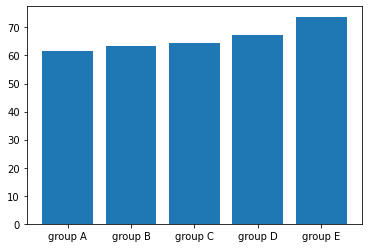

In [33]:
df_plot = data_pivot.reset_index()
plt.bar(df_plot['race/ethnicity'], df_plot['math score'])
plt.show()

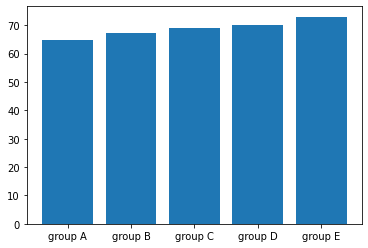

In [90]:
df_plot = data_pivot.reset_index()
plt.bar(df_plot['race/ethnicity'], df_plot['reading score'])
plt.show()

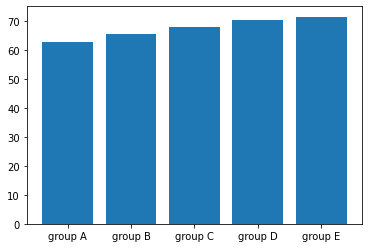

In [91]:
df_plot = data_pivot.reset_index()
plt.bar(df_plot['race/ethnicity'], df_plot['writing score'])
plt.show()

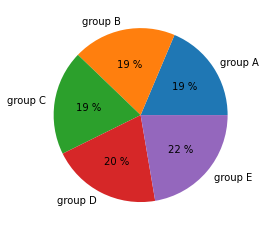

In [92]:
plt.pie(df_plot['math score'], labels=df_plot['race/ethnicity'], autopct='%.0f %%')
plt.show()

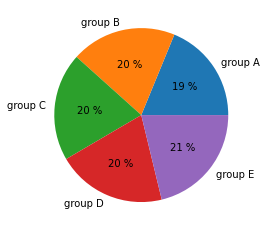

In [93]:
plt.pie(df_plot['reading score'], labels=df_plot['race/ethnicity'], autopct='%.0f %%')
plt.show()

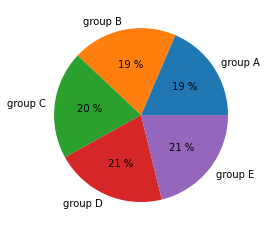

In [94]:
plt.pie(df_plot['writing score'], labels=df_plot['race/ethnicity'], autopct='%.0f %%')
plt.show()

<AxesSubplot:xlabel='math score', ylabel='Count'>

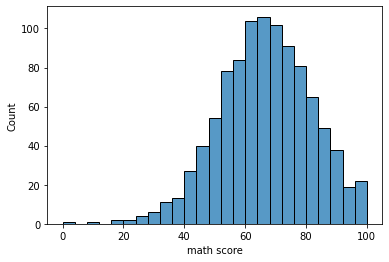

In [56]:
sns.histplot(student_data['math score'])


<AxesSubplot:xlabel='reading score', ylabel='Count'>

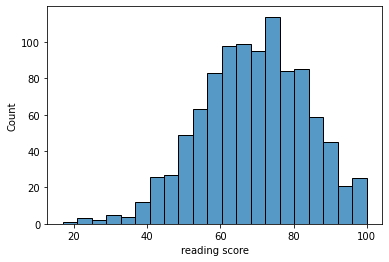

In [55]:
sns.histplot(student_data['reading score'])
#distplot out use displot, or histplot for histograms

<AxesSubplot:xlabel='writing score', ylabel='Count'>

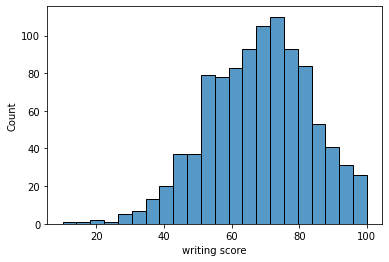

In [54]:
sns.histplot(student_data['writing score'])

<AxesSubplot:xlabel='average', ylabel='Count'>

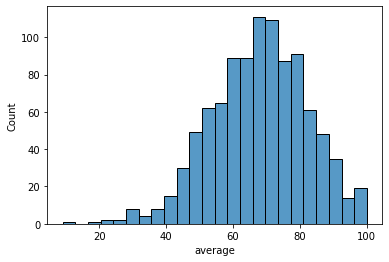

In [53]:
sns.histplot(student_data['average'])

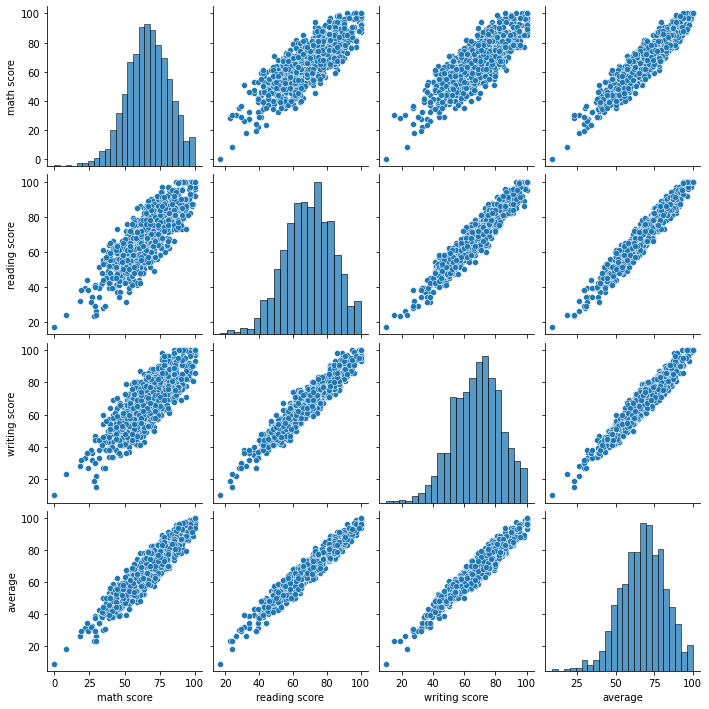

In [57]:
sns.pairplot(student_data)

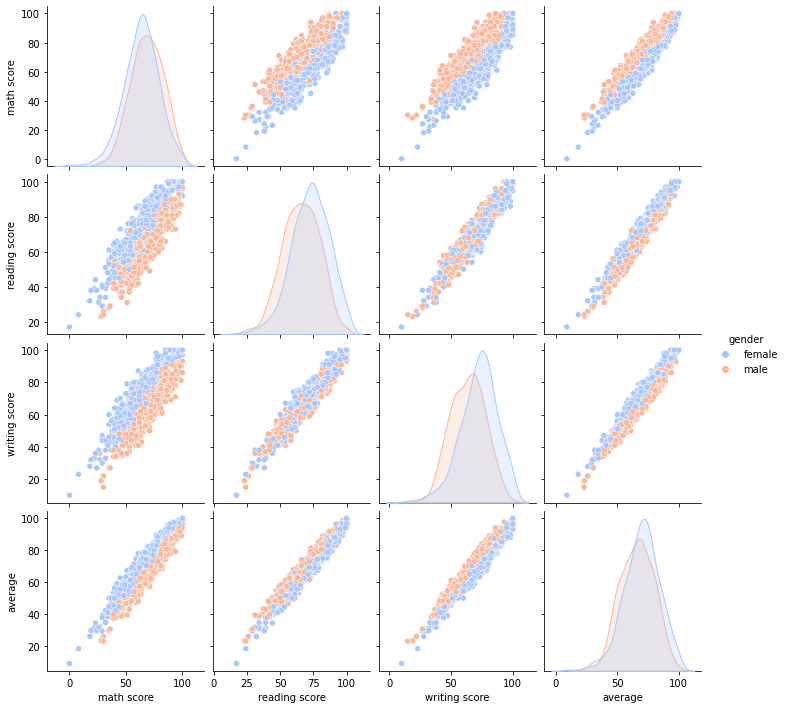

In [60]:
sns.pairplot(student_data, hue = 'gender', palette= 'coolwarm')

<AxesSubplot:xlabel='gender', ylabel='average'>

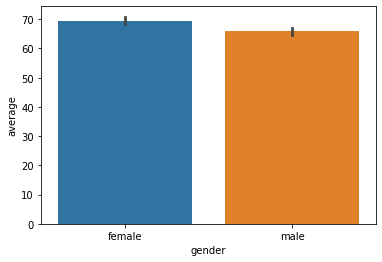

In [61]:
sns.barplot(x = 'gender', y = 'average', data = student_data)

<AxesSubplot:xlabel='gender', ylabel='reading score'>

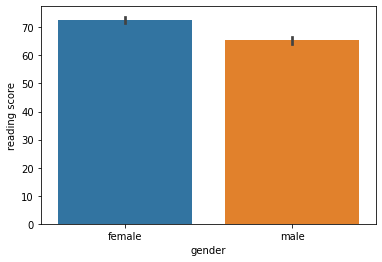

In [64]:
sns.barplot(x = 'gender', y = 'reading score', data = student_data)

<AxesSubplot:xlabel='gender', ylabel='writing score'>

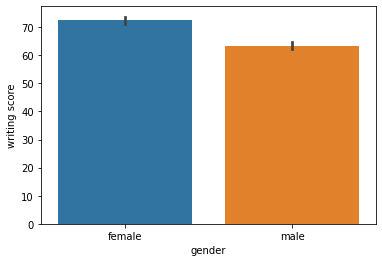

In [65]:
sns.barplot(x = 'gender', y = 'writing score', data = student_data)

<AxesSubplot:xlabel='gender', ylabel='math score'>

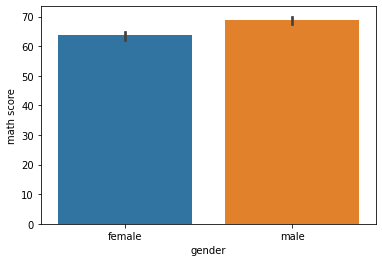

In [66]:
sns.barplot(x = 'gender', y = 'math score', data = student_data)

<AxesSubplot:xlabel='gender', ylabel='count'>

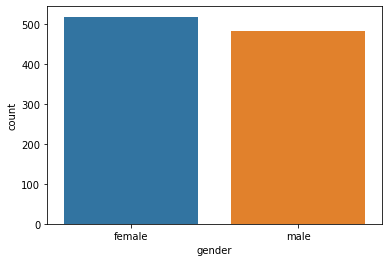

In [67]:
sns.countplot(x = 'gender', data = student_data)

<AxesSubplot:>

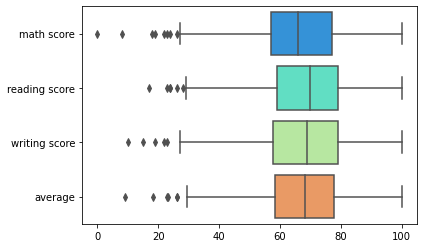

In [68]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=student_data,palette='rainbow',orient='h')

<AxesSubplot:>

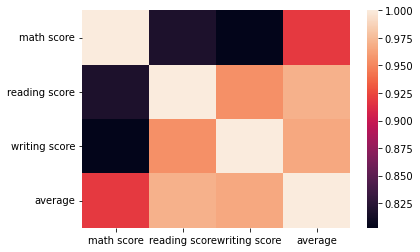

In [69]:
sns.heatmap(student_data.corr())